# Gradient Checking



# Adding Previous Model and data

In [1]:
import numpy as np

# load the text file into an array
train_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_x.npy')
test_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_x.npy')
cv_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_x.npy')

train_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_y.npy')
test_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_y.npy')
cv_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_y.npy')


In [51]:
from dnn_app_utils_v3 import *

In [52]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0318, num_iterations = 500, print_cost=False):

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [53]:
n_1=46
alpha=0.0104

In [54]:
n_x = train_set_x.shape[0]

layers_dims = [n_x, n_1, 4, 1] #  4-layer model

Cost after iteration 0: 0.694815
Cost after iteration 100: 0.662196
Cost after iteration 200: 0.652032
Cost after iteration 300: 0.644698
Cost after iteration 400: 0.638393


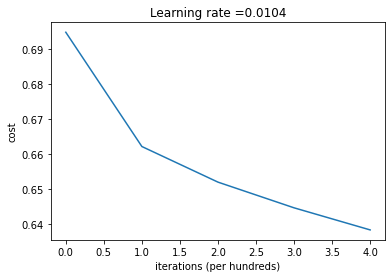

In [55]:
parameters = L_layer_model(train_set_x, train_set_y.reshape(1, -1), 
                           layers_dims, learning_rate = alpha, num_iterations = 500, print_cost = True)

In [56]:
X = train_set_x
Y = train_set_y
parameters

{'W1': array([[ 1.87464609e-02, -6.70435894e-03, -5.39017842e-03, ...,
         -1.47941893e-02, -2.46372957e-03, -5.37213640e-03],
        [ 1.31781736e-02,  1.27421024e-02,  3.76974642e-03, ...,
          9.55391426e-03,  1.00103128e-02, -1.11684370e-02],
        [-1.22765796e-03,  6.09938259e-03,  4.07170770e-03, ...,
         -1.60253973e-02,  3.05546532e-03,  4.88768374e-03],
        ...,
        [-4.86132503e-03, -6.20238148e-03,  3.63657441e-05, ...,
         -7.51062851e-03, -1.17712298e-02,  1.31423405e-03],
        [ 9.01906602e-04,  3.16157468e-03,  1.35192863e-02, ...,
         -4.52922357e-03,  2.53890128e-02, -8.61851682e-03],
        [-1.66423003e-02, -3.30442482e-03,  1.89960446e-02, ...,
         -1.56387819e-02, -1.20588237e-02,  8.10268308e-05]]),
 'b1': array([[-3.26387404e-03],
        [ 3.50190510e-03],
        [ 3.61851275e-03],
        [ 3.61150149e-03],
        [-2.38754189e-03],
        [ 6.52775805e-04],
        [ 2.99150121e-03],
        [-2.48398760e-04],
 

In [57]:
# Packages
import numpy as np
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector

In [58]:
def forward_propagation_n(X, Y, parameters):
   

    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

In [59]:
def backward_propagation_n(X, Y, cache):

    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) * 2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 4./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [60]:
#take a look
parameters_values, keys = dictionary_to_vector(parameters)
parameters_values

array([[ 0.01874646],
       [-0.00670436],
       [-0.00539018],
       ...,
       [ 0.06038451],
       [-0.06431899],
       [-0.00707566]])

In [61]:
def vector_to_dictionary(theta): 
    parameters = {}
    parameters["W1"] = theta[:254016].reshape((32, 7938))
    parameters["b1"] = theta[254016:254048].reshape((32, 1))
    parameters["W2"] = theta[254048:254176].reshape((4, 32))
    parameters["b2"] = theta[254176:254180].reshape((4, 1))
    parameters["W3"] = theta[254180:254184].reshape((1, 4))
    parameters["b3"] = theta[254184:254185].reshape((1,1))

    return parameters

In [64]:
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):

    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        if i%10000==0:
            print(i,"/",num_parameters)
            
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        thetaplus = np.copy(parameters_values)                                      # Step 1
        thetaplus[i][0] = thetaplus[i] + epsilon                                    # Step 2
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus)) # Step 3

        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        thetaminus = np.copy(parameters_values)                                       # Step 1
        thetaminus[i][0] = thetaminus[i] - epsilon                                    # Step 2        
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus)) # Step 3                              
        
        
        # Compute gradapprox[i]
        gradapprox[i] = (J_plus[i]-J_minus[i])/(2*epsilon)

    
    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad-gradapprox)                                     # Step 1'
    denominator = np.linalg.norm(grad)+np.linalg.norm(gradapprox)                  # Step 2'
    difference = numerator /denominator                                           # Step 3'
    ### END CODE HERE ###

    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [65]:
#example

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

0 / 365387
1000 / 365387
2000 / 365387
3000 / 365387
4000 / 365387
5000 / 365387
6000 / 365387
7000 / 365387
8000 / 365387
9000 / 365387
10000 / 365387
11000 / 365387
12000 / 365387
13000 / 365387
14000 / 365387
15000 / 365387
16000 / 365387
17000 / 365387
18000 / 365387
19000 / 365387
20000 / 365387
21000 / 365387
22000 / 365387
23000 / 365387
24000 / 365387
25000 / 365387
26000 / 365387
27000 / 365387
28000 / 365387
29000 / 365387
30000 / 365387
31000 / 365387
32000 / 365387
33000 / 365387
34000 / 365387
35000 / 365387
36000 / 365387
37000 / 365387
38000 / 365387
39000 / 365387
40000 / 365387
41000 / 365387
42000 / 365387
43000 / 365387
44000 / 365387
45000 / 365387
46000 / 365387
47000 / 365387
48000 / 365387
49000 / 365387
50000 / 365387
51000 / 365387
52000 / 365387
53000 / 365387
54000 / 365387
55000 / 365387
56000 / 365387
57000 / 365387
58000 / 365387
59000 / 365387
60000 / 365387
61000 / 365387
62000 / 365387
63000 / 365387
64000 / 365387
65000 / 365387
66000 / 365387
67000 / 